# Resultados Para el concurso de examen de admisión en Derecho, UNAM

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [71]:
resDerecho = requests.get("https://www.dgae.unam.mx/Febrero2019/resultados/3/30500075.html", verify=False)

/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [72]:
soup = BeautifulSoup(resDerecho.content, features='html5lib')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
new_columns = df.columns.values

In [73]:
new_columns

array([('Folio', 'no se encontraron resultados para la búsqueda'),
       ('Aciertos', 'Unnamed: 1_level_1'),
       ('Acreditado', 'Unnamed: 2_level_1'),
       ('Detalles', 'Unnamed: 3_level_1'),
       ('Diagnóstico', 'Unnamed: 4_level_1')], dtype=object)

In [74]:
new_columns[0] = 'Folio'; new_columns[1] = 'Aciertos'; new_columns[2] = 'Acreditado';

In [75]:
df.columns = new_columns
df.head(5)

,Folio,Aciertos,Acreditado,"(Detalles, Unnamed: 3_level_1)","(Diagnóstico, Unnamed: 4_level_1)"
0,155006,93.0,S,Cita para entregar documentación.,Consultar
1,155007,100.0,S,Cita para entregar documentación.,Consultar
2,155017,54.0,NaN,NaN,Consultar
3,155021,38.0,NaN,NaN,Consultar
4,155030,112.0,S,Cita para entregar documentación.,Consultar


In [76]:
df = df[['Folio', 'Aciertos','Acreditado']]

In [77]:
df.tail()

,Folio,Aciertos,Acreditado
4929,207213,77.0,NaN
4930,207247,33.0,NaN
4931,207304,75.0,NaN
4932,207307,NaN,N
4933,207311,59.0,NaN


In [78]:
df.describe()

,Folio,Aciertos
count,4934.000000,4493.000000
mean,181425.490474,56.888716
std,15244.656295,18.431592
min,155006.000000,12.000000
25%,168127.000000,43.000000
50%,181626.500000,53.000000
75%,195810.750000,68.000000
max,207311.000000,115.000000


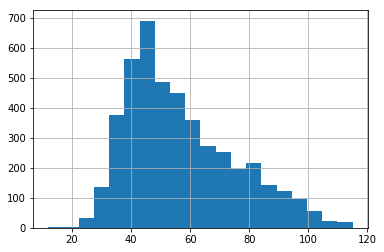

In [79]:
hist = df['Aciertos'].hist(bins=20)

In [80]:
#df[df['Acreditado'] == 'S']
cleanedList = [x for x in df['Aciertos'].values if str(x) != 'nan']

In [81]:
import numpy as np
count, division = np.histogram(cleanedList)

In [82]:
from matplotlib import pyplot as plt 

(array([   4.,  170.,  940., 1176.,  807.,  525.,  410.,  265.,  154.,
          42.]),
 array([ 12. ,  22.3,  32.6,  42.9,  53.2,  63.5,  73.8,  84.1,  94.4,
        104.7, 115. ]),
 <a list of 10 Patch objects>)

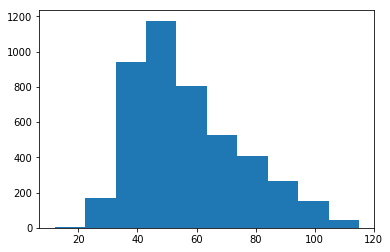

In [83]:
plt.hist(cleanedList)

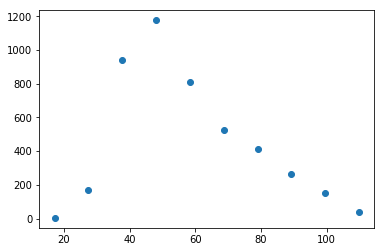

In [84]:
plt.plot((division[1:]+division[:-1])/2,count,'o')

In [85]:
np.savetxt('histcoords.txt', np.transpose(((division[1:]+division[:-1])/2,count)), delimiter=',', fmt='%f')